In [17]:
%matplotlib inline
from math import pi, sqrt
from scipy.special import gamma
import numpy as np
import matplotlib.pyplot as plt

### 1. Prove through code what happens to the volume of the sphere in higher dimensions.  What about a cube?

The volume of a sphere with radius $r$ in $d$ dimensions is:

$$V_S(r,d) = \frac{(\pi r^{2})^{d/2}}{\Gamma \big(\frac{d}{2} + 1 \big)}$$

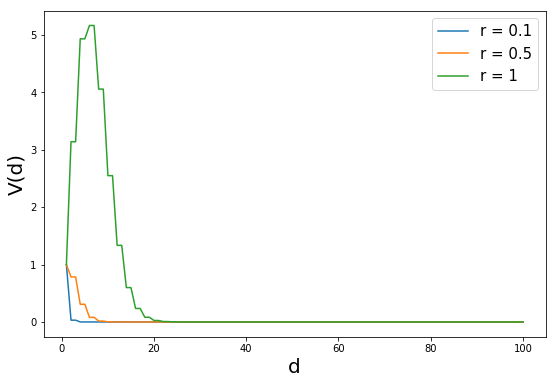

In [56]:
rad = [0.1, 0.5, 1, 10, 100]
dim = list(range(1,101))

plot_mat = []

for r in rad:
    plot_mat_row = []
    
    for d in dim:
        V = (pi*r**2)**(d/2)/gamma((d/2) + 1)
        
        plot_mat_row.append(V)
        
    plot_mat.append(plot_mat_row)


plt.figure(figsize=(9,6))
plt.plot(dim, plot_mat[0], label="r = 0.1")
plt.plot(dim, plot_mat[1], label="r = 0.5")
plt.plot(dim, plot_mat[2], label="r = 1")
plt.xlabel("d", fontsize = 20)
plt.ylabel("V(d)", fontsize = 20)
plt.legend(prop = {"size": 15})

To prove this using code, we'll plot the numerator and denominator of the volume function to show their differing rates of growth.  The reasoning here follow from L'Hopital's rule, which tells us that when

$$f(x) = \frac{g(x)}{h(x)}$$

if $h^\prime (x) > g^\prime (x)$ as $x \to \infty$, then $f(x) \to 0$ as $x \to \infty$.

### 2. Is my assertion that in high dimensions every distance is about the same, and none is near or far, correct?  Why or why not?

Yes it is correct.  To illustrate this we are going to calculate the ratio of Euclidean distances between a point and two other points in $\mathbb{R}^n$ as $n \to \infty$.

In [ ]:
dim = list(range(1, 1001))
dist_12 = []
dist_13 = []

for d in dim:
    p1 = [1]*d
    p2 = [2]*d
    p3 = [10]*d
    
    for i in range(len(p1)):
        dist = np.sum((np.array(p1) - np.array(p2))**d)**(1/d)
        dist_12.append(dist)
        
        dist = np.sum((np.array(p1) - np.array(p3))**d)**(1/d)
        dist_13.append(dist)
        
ratio = np.array(dist_12) / np.array(dist_13)
plt.figure()
plt.plot(ratio)

### 3. Why does any of this matter in terms of data science and machine learning?

The point made in #1 matters in terms of training a model with a feature space.  In a feature space of very high dimensions the data can become incredibly sparse, requiring more and more observations for a model to have exposure to all possible states of the system.  In most practical applications, the required amount of data is simply unavailable, or is not tractable to compute.

The point made in #2 matters in terms of any model or analysis that measures distance in some way.  For example, in nearest neighbors searches the goal is to identify data points that are "close" with the assumption that closer points are more relevant than farther points.  This assumption loses all meaning if the all points are essentially equidistant from all other points.

### Bonus: Answer all questions where possible with a mathematical proof, not just code.